In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pointbiserialr
from scipy.stats import shapiro, normaltest

In [10]:
# Open cleaned data
file = 'clean_data/cleaned_DDoS_and_begnin_traffic_dataset.csv'
df = pd.read_csv(file)

# Display first few rows to confirm merge
display(df.head())

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [11]:
selected_features = [
    ' Destination Port', ' Fwd Packet Length Max',
    ' Fwd Packet Length Mean', 'Bwd Packet Length Max',
    ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
    ' Bwd Packet Length Std', ' Fwd IAT Std', 'Bwd IAT Total',
    ' Bwd IAT Max', ' Min Packet Length', ' Max Packet Length',
    ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
    ' PSH Flag Count', ' URG Flag Count', ' Average Packet Size',
    ' Avg Fwd Segment Size', ' Avg Bwd Segment Size'
]

In [12]:
target_col = ' Label'

# Convert to binary: 0 = BENIGN, 1 = ATTACK (any non-BENIGN)
df[target_col] = (df[target_col] != 'BENIGN').astype(int)


In [13]:
# labels in data
print(df[' Label'].unique())

[0 1]


### Check for Linearity in features 

In [14]:
# Compute correlations
corrs = {}
for feat in selected_features:
    # Use point-biserial correlation (for continuous vs binary target)
    r, p = pointbiserialr(df[feat], df[target_col])
    corrs[feat] = (r, p)

corr_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['Correlation', 'p-value'])
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

display(corr_df)

,Correlation,p-value
Bwd Packet Length Mean,0.656123,0.0
Avg Bwd Segment Size,0.656123,0.0
Bwd Packet Length Std,0.644818,0.0
Bwd Packet Length Max,0.638229,0.0
Packet Length Std,0.571075,0.0
Packet Length Mean,0.564972,0.0
Average Packet Size,0.564775,0.0
Max Packet Length,0.542217,0.0
Packet Length Variance,0.533354,0.0
PSH Flag Count,0.231524,0.0


/tmp/ipykernel_253564/1287390819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=corr_df.reset_index(), x='Correlation', y='index', palette='coolwarm')


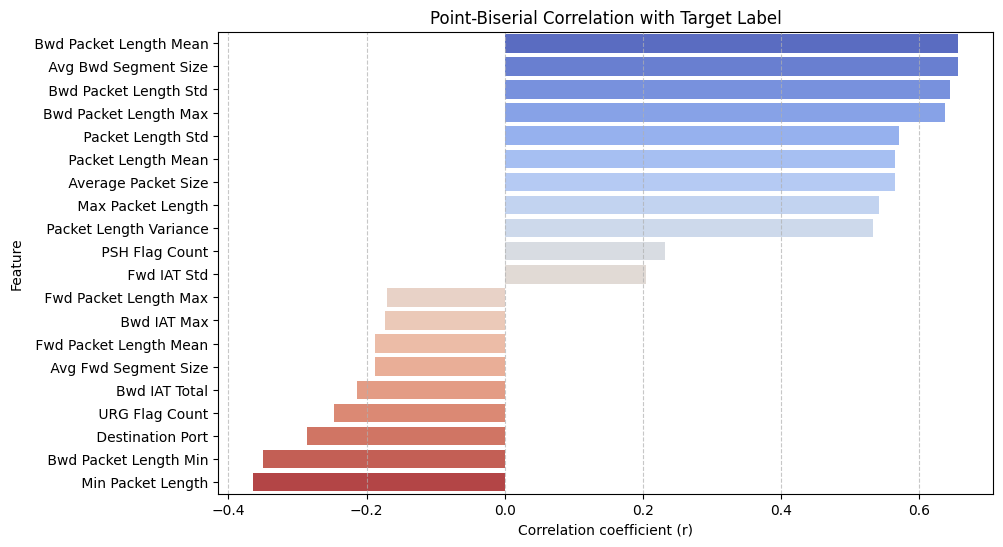

In [15]:
# Visualize correlation strength
plt.figure(figsize=(10, 6))
sns.barplot(data=corr_df.reset_index(), x='Correlation', y='index', palette='coolwarm')
plt.title("Point-Biserial Correlation with Target Label")
plt.xlabel("Correlation coefficient (r)")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_253564/442623322.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=feat, data=df, palette='Set2')
/tmp/ipykernel_253564/442623322.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=feat, data=df, palette='Set2')
/tmp/ipykernel_253564/442623322.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=feat, data=df, palette='Set2')
/tmp/ipykernel_253564/442623322.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

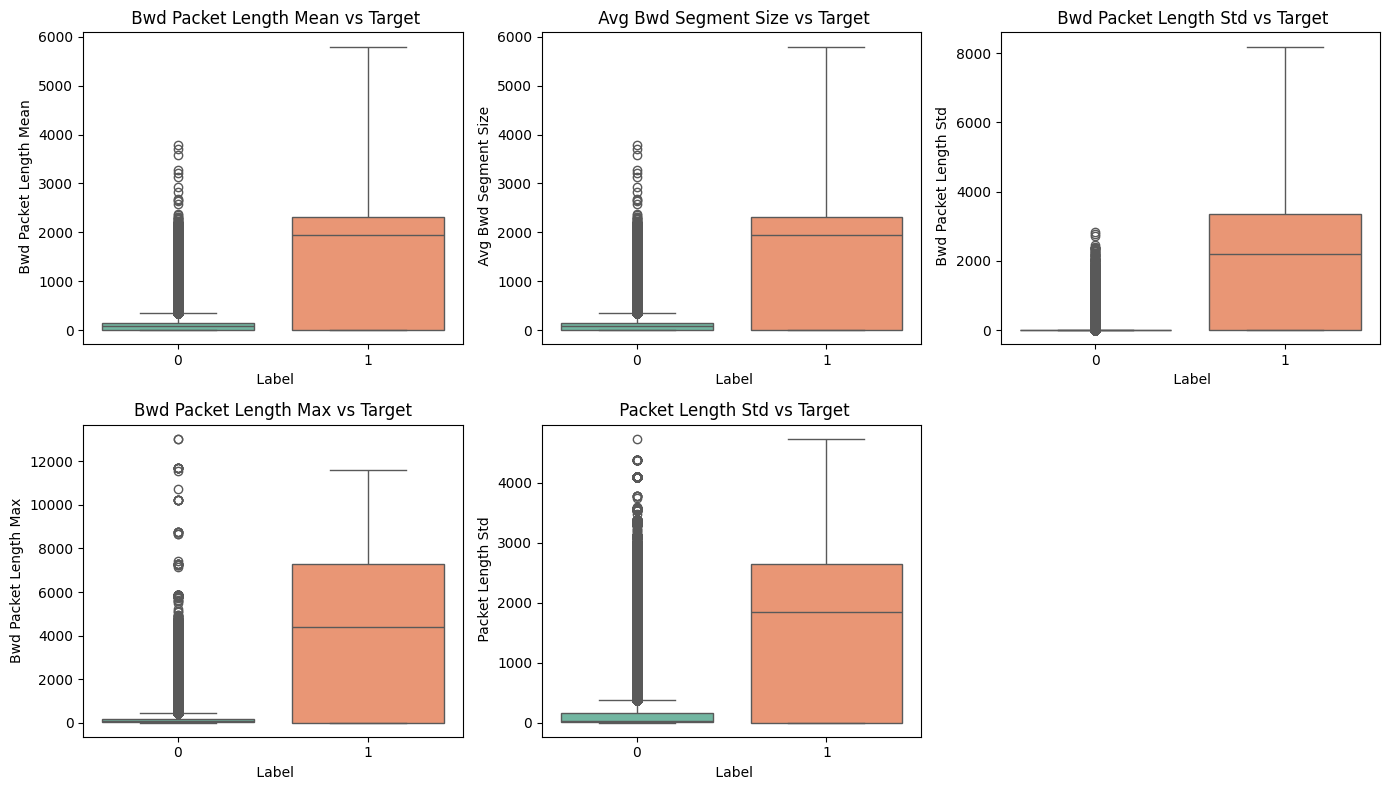

In [16]:
# (Optional) Feature vs Target Boxplots
# Visualize distributions of top correlated features
top_feats = corr_df.head(5).index.tolist()
plt.figure(figsize=(14, 8))
for i, feat in enumerate(top_feats, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=target_col, y=feat, data=df, palette='Set2')
    plt.title(f"{feat} vs Target")
plt.tight_layout()
plt.show()

### Class Balance

In [19]:
print("### CLASS BALANCE ###")
class_counts = df[' Label'].value_counts()
class_ratio = class_counts / len(df)
print("Counts:\n", class_counts)
print("Ratios:\n", class_ratio)

### CLASS BALANCE ###
Counts:
  Label
0    275439
1    129962
Name: count, dtype: int64
Ratios:
  Label
0    0.679424
1    0.320576
Name: count, dtype: float64


/tmp/ipykernel_253564/3862707609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index.map({0:'BENIGN', 1:'MALICIOUS'}), y=class_counts.values, palette='viridis')


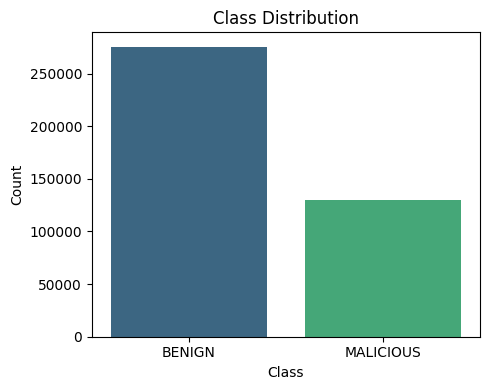

In [21]:
# Visualize
plt.figure(figsize=(5,4))
sns.barplot(x=class_counts.index.map({0:'BENIGN', 1:'MALICIOUS'}), y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xlabel('Class')
plt.tight_layout()
plt.show()

### Check for Normality

In [22]:
normality_results = []

for col in selected_features:
    # D’Agostino and Pearson’s test (good for larger samples)
    stat, p = normaltest(df[col])
    normality_results.append((col, stat, p))

normality_df = pd.DataFrame(normality_results, columns=["Feature", "Statistic", "p-value"])
normality_df['Normally_Distributed'] = normality_df['p-value'] > 0.05
display(normality_df.sort_values("p-value"))

,Feature,Statistic,p-value,Normally_Distributed
0,Destination Port,145272.587128,0.0,False
1,Fwd Packet Length Max,427449.488075,0.0,False
2,Fwd Packet Length Mean,366204.572515,0.0,False
3,Bwd Packet Length Max,126449.966280,0.0,False
4,Bwd Packet Length Min,479692.242572,0.0,False
5,Bwd Packet Length Mean,85440.034304,0.0,False
6,Bwd Packet Length Std,148781.618875,0.0,False
7,Fwd IAT Std,251671.516210,0.0,False
8,Bwd IAT Total,261219.104008,0.0,False
9,Bwd IAT Max,363113.621913,0.0,False


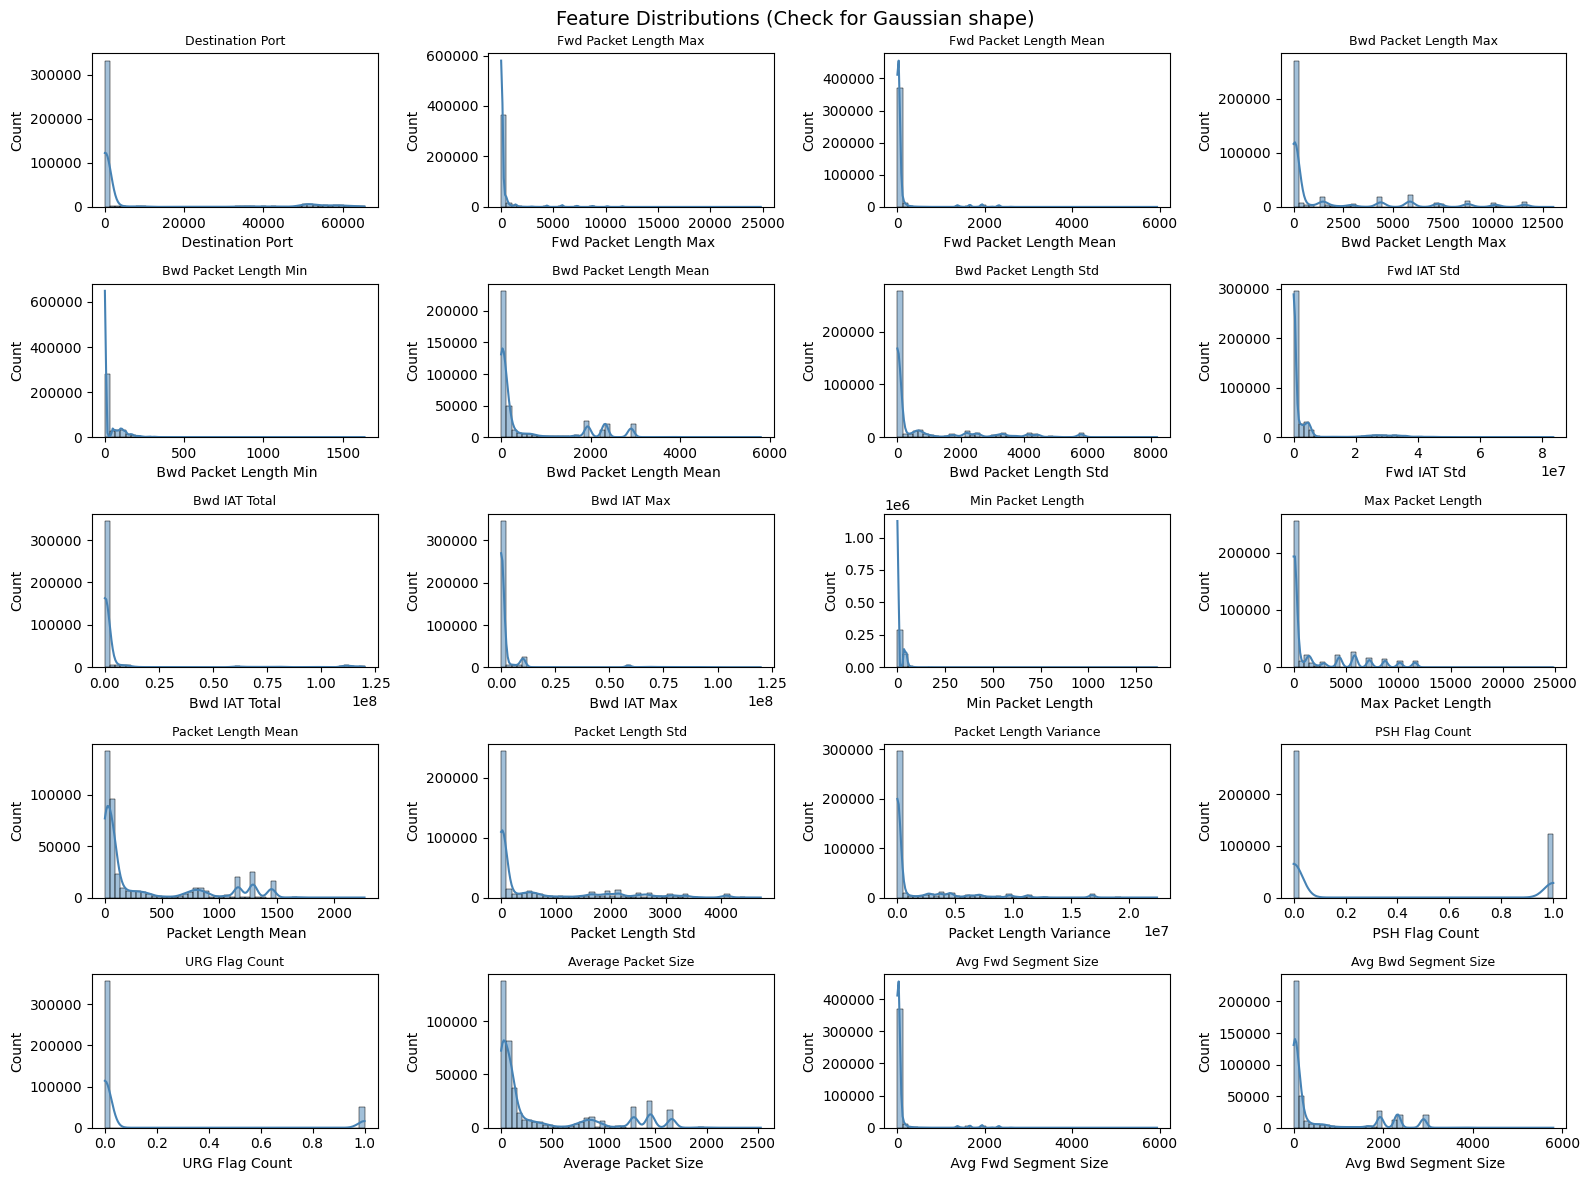

In [23]:
# Visualize distributions (histograms + KDE)
ncols = 4
nrows = int(np.ceil(len(selected_features)/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(selected_features):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(col.strip(), fontsize=9)
plt.suptitle("Feature Distributions (Check for Gaussian shape)", fontsize=14)
plt.tight_layout()
plt.show()